In [3]:
# uniquement pour utliser dans colab : 

# !git clone https://github.com/CarinePivoteau/Alea2023Notebooks.git
# import sys
# sys.path.append('/content/Alea2023Notebooks')

In [4]:
# si les modules ne sont pas installés :

# import sys
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install graphviz

In [5]:
import sys
sys.path.append('../')

# imports : random, time, math, sys, plt, graphviz

from helpers import *
from gen_laws import *

In [6]:
from matplotlib.patches import Rectangle

def draw_circuit(c):
    plt.rcParams['figure.figsize'] = [10, 10]
    fig, ax = plt.subplots()
    ax.plot()
    
    def dimensions(c): # l,h
        if c=='Z':
            return [1,1,None]
        else: 
            ds = [dimensions(t) for t in c[1:]]
            ls = [d[0] for d in ds]
            hs = [d[1] for d in ds]
            if c[0]=='S':   
                return [sum(ls)+len(c),max(hs)+2,  ds]
            elif c[0]=='P':
                return [max(ls)+2, sum(hs)+len(c), ds]
            else:
                raise "impossible..."
            
    def draw(d,x,y,o):
        ax.add_patch(Rectangle((x,y),d[0],d[1],fill=False))
        if d[2]==None:
            return
        if o=='P':
            ny = y+1
            for i in range(len(d[2])-1,-1,-1):
                li,hi,di = d[2][i]
                draw(d[2][i],x+1,ny,'S')
                ny+=hi+1
        if o=='S':
            nx = x+1
            for i in range(len(d[2])-1,-1,-1):
                li,hi,di = d[2][i]
                draw(d[2][i],nx,y+1,'P')
                nx+=li+1
    
    d = dimensions(c)
    draw(d,1,1,c[0])
    
    plt.axis('equal')
    plt.axis('off')
    plt.show()

In [7]:
# {SP = Union(S,P), S = Sequence(Union(Z,P),card>=2), P = Set(Union(Z,S),card>=2)}
P,S,SP = dict(),dict(),dict()
x = 0.2451438475598137
xValues = [x]
P[x] = 0.1368221595124981
S[x] = 0.2360679707399782
SP[x] = 0.3728901302524763

x = 0.2451438475
xValues.append(x)
P[x] = 0.1368220951
S[x] = 0.2360678666
SP[x] = 0.3728899617

x = 0.245143
xValues.append(x)
P[x] = 0.1362846333
S[x] = 0.2351980904
SP[x] = 0.3714827236

x = 0.2451
xValues.append(x)
P[x] = 0.1329816377
S[x] = 0.2298464452
SP[x] = 0.3628280829

x = 0.2
xValues.append(x)
P[x] = 0.04232734905 
S[x] = 0.07750384553
SP[x] = 0.1198311946

In [8]:
print(xValues,P,S,SP)

[0.2451438475598137, 0.2451438475, 0.245143, 0.2451, 0.2] {0.2451438475598137: 0.1368221595124981, 0.2451438475: 0.1368220951, 0.245143: 0.1362846333, 0.2451: 0.1329816377, 0.2: 0.04232734905} {0.2451438475598137: 0.2360679707399782, 0.2451438475: 0.2360678666, 0.245143: 0.2351980904, 0.2451: 0.2298464452, 0.2: 0.07750384553} {0.2451438475598137: 0.3728901302524763, 0.2451438475: 0.3728899617, 0.245143: 0.3714827236, 0.2451: 0.3628280829, 0.2: 0.1198311946}


In [17]:
def random_circuit_free(x, maxi):
    size = 0
    def sizeUP():
        nonlocal size, maxi # compteur global
        size += 1
        if size > maxi:
            raise Exception("Too large")   
    def gen_unionZP():
        u = random.random()
        if u < x/(x + P[x]):
            sizeUP()
            return 'Z'
        else: return genP()
    def gen_unionZS():
        u = random.random()
        if u < x/(x + S[x]):
            sizeUP()
            return 'Z'
        else: return genS()
    def genS():
        k = fast_geom(x + P[x])+2
        return ['S'] + [gen_unionZP() for i in range(k)]
    def genP():
        k = poiss(x + S[x])
        while(k < 2):
            k = poiss(x + S[x])
        return ['P'] + [gen_unionZS() for i in range(k)]
    try:
        u = random.random()
        if u < P[x]/(SP[x]):
            return genP(), size
        else : return genS(), size
    except Exception as err:
        #print(err)
        return None, 0 
        

In [23]:
c, size = random_circuit_free(xValues[4],1000)
print(c, size)

['P', 'Z', ['S', 'Z', ['P', 'Z', 'Z'], ['P', 'Z', 'Z'], 'Z'], 'Z'] 8


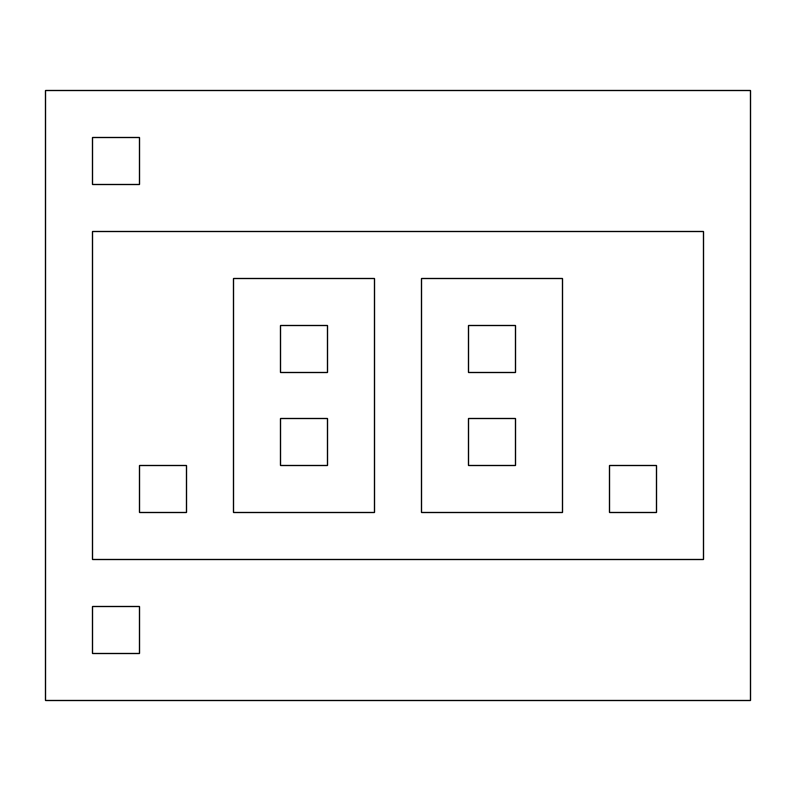

In [24]:
draw_circuit(c)

In [25]:
def random_circuit(x, n):
    return gen_random_fixed_size(random_circuit_free, x, n)

def random_circuit_approx(x, mini, maxi):
    return gen_random_approx_size(random_circuit_free, x, mini, maxi)

In [26]:
nb_trials,size_trials,circuit,size = random_circuit_approx(xValues[3],200,300)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}\n".format(nb_trials,size_trials,size))
print(circuit)


nombre d'essais = 6, taille du rejet = 248, taille du circuit = 212

['S', ['P', ['S', ['P', 'Z', ['S', 'Z', 'Z', ['P', ['S', ['P', ['S', 'Z', 'Z'], ['S', ['P', 'Z', ['S', 'Z', 'Z']], ['P', ['S', 'Z', 'Z'], 'Z', ['S', ['P', 'Z', 'Z', ['S', 'Z', 'Z'], 'Z'], 'Z']], ['P', ['S', 'Z', 'Z', 'Z'], ['S', 'Z', 'Z']], 'Z']], 'Z', 'Z'], ['S', 'Z', ['P', ['S', 'Z', 'Z', ['P', ['S', 'Z', 'Z'], ['S', ['P', ['S', 'Z', ['P', ['S', ['P', ['S', ['P', ['S', ['P', 'Z', ['S', 'Z', ['P', 'Z', 'Z'], 'Z'], ['S', 'Z', 'Z']], 'Z', 'Z'], ['S', 'Z', 'Z', 'Z']], 'Z'], 'Z', 'Z'], 'Z', 'Z'], ['S', 'Z', ['P', 'Z', 'Z']]]], ['S', ['P', 'Z', 'Z'], 'Z', 'Z']], 'Z'], ['S', 'Z', 'Z']]], 'Z']]]]], ['P', 'Z', 'Z']], ['S', ['P', 'Z', 'Z', 'Z', ['S', ['P', 'Z', ['S', ['P', ['S', ['P', 'Z', ['S', 'Z', ['P', ['S', ['P', 'Z', ['S', 'Z', ['P', 'Z', 'Z', ['S', 'Z', 'Z']]]], ['P', ['S', 'Z', ['P', 'Z', ['S', ['P', ['S', 'Z', 'Z', 'Z', 'Z'], ['S', 'Z', ['P', ['S', 'Z', 'Z'], 'Z']]], 'Z']]], ['S', 'Z', ['P', ['S', 'Z', ['P', 'Z', ['

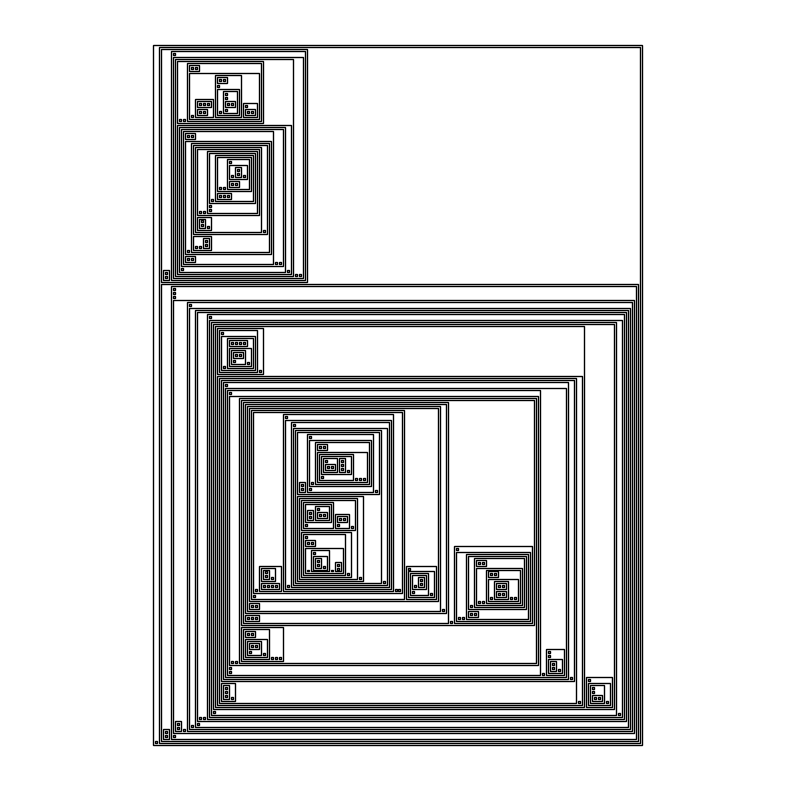

In [27]:
draw_circuit(circuit)

In [13]:
import sys
sys.setrecursionlimit(100000)
nb_trials,size_trials,circuit,size = random_circuit_approx(xValues[2],10_000,100_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))


nombre d'essais = 31, taille du rejet = 47194, taille du circuit = 35195


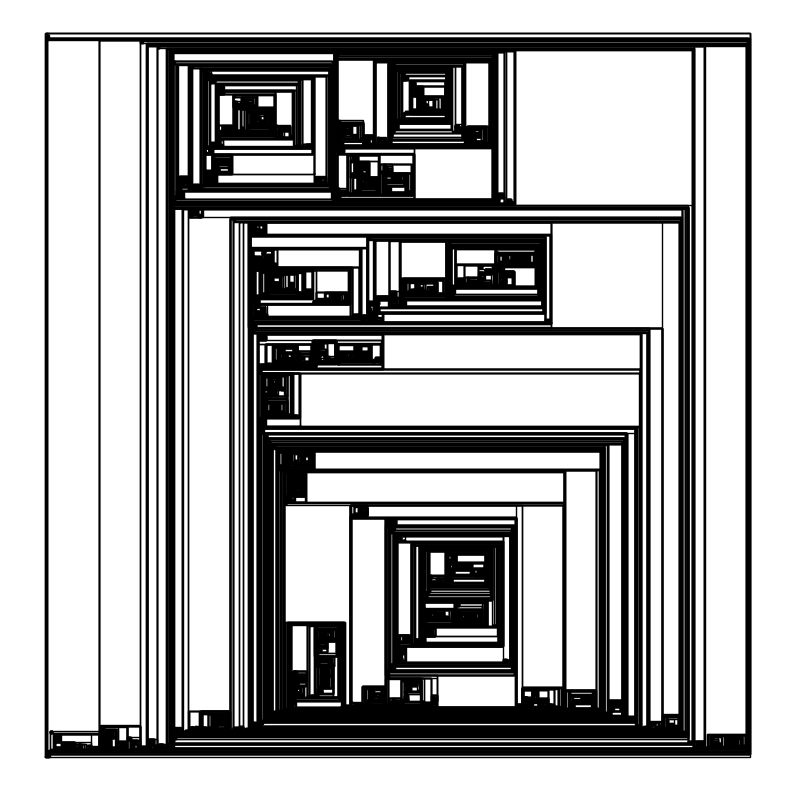

In [14]:
draw_circuit(circuit)

In [15]:
nb_trials,size_trials,circuit,size = random_circuit_approx(xValues[2],100_000,1_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))


nombre d'essais = 92, taille du rejet = 240746, taille du circuit = 143354


In [16]:
nb_trials,size_trials,circuit,size = random_circuit_approx(xValues[1],500_000,1_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))


nombre d'essais = 19, taille du rejet = 525456, taille du circuit = 516655


In [17]:
nb_trials,size_trials,circuit,size = random_circuit_approx(xValues[0],1_000_000,2_000_000)
print("nombre d'essais = {}, taille du rejet = {}, taille du circuit = {}".format(nb_trials,size_trials,size))

.....................................
nombre d'essais = 3776, taille du rejet = 6095126, taille du circuit = 1707158


--- vérification du générateur ---

In [18]:
count_occurences(lambda : random_circuit(xValues[3],3)[2],1000000)
print(100./19) 
# 19 circuits 
# ['S', ['P', 'Z', 'Z'], 'Z'] x3
# ['P', ['S', 'Z', 'Z'], 'Z'] = ['P', 'Z', ['S', 'Z', 'Z']] x6
# ['S', 'Z', ['P', 'Z', 'Z']] x3
# ['S', 'Z', 'Z', 'Z'] x6
# ['P', 'Z', 'Z', 'Z'] x1

nb: 6
['P', ['S', 'Z', 'Z'], 'Z'] 15.75
['S', 'Z', 'Z', 'Z'] 31.54
['P', 'Z', 'Z', 'Z'] 5.25
['S', ['P', 'Z', 'Z'], 'Z'] 15.83
['S', 'Z', ['P', 'Z', 'Z']] 15.78
['P', 'Z', ['S', 'Z', 'Z']] 15.85
5.2631578947368425


In [19]:
n = 10_000
l = counts_max_and_average(lambda : random_circuit_free(xValues[0],1000)[1], n)

trop grands = 362, taille max = 998, moyenne des tailles = 34.2417


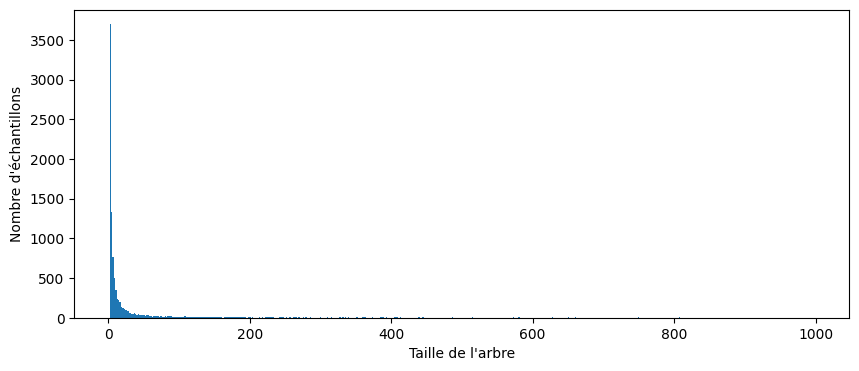

<Figure size 1000x400 with 0 Axes>

In [20]:
plt.rcParams['figure.figsize'] = [10, 4]

plt.hist(l,bins=500)
plt.xlabel("Taille de l'arbre")
plt.ylabel("Nombre d'échantillons")
f = plt.figure()
plt.show()